In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.shape

(41188, 21)

In [10]:
df['conversion'] = df['y'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


# 1. Aggregate Conversion Rate

In [14]:
print(f"Total conversions: {len(df[df['conversion']==1])} out of {len(df)}")

Total conversions: 4640 out of 41188


In [17]:
print(f"Conversion rate: {len(df[df['conversion']==1]) / len(df) * 100:.2f}%")

Conversion rate: 11.27%


# 2. Conversion Rates by Number of Contacts

In [25]:
pd.DataFrame(df.groupby(df['campaign'])['conversion'].sum()).sort_values(by=['conversion'], ascending=False)

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [26]:
pd.DataFrame(df.groupby(df['campaign'])['conversion'].count()).sort_values(by=['conversion'], ascending=False)

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [29]:
conversions_by_contacts =  df.groupby(df['campaign'])['conversion'].sum() / df.groupby(df['campaign'])['conversion'].count() * 100
pd.DataFrame(conversions_by_contacts)

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
5,7.504690
6,7.660878
7,6.041335
8,4.250000
9,6.007067


Text(0.5, 0, 'Number of contacts')

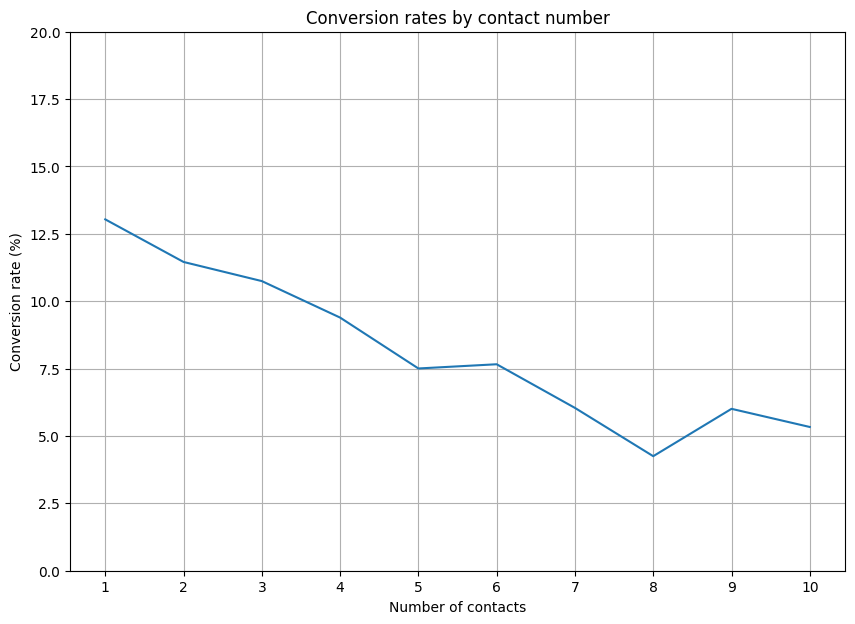

In [166]:
ax = conversions_by_contacts[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion rates by contact number',
)

ax.set_ylim([0,20])
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Number of contacts')


# 3. Conversion Rate by Ages

In [34]:
pd.DataFrame(df.groupby(df['age'])['conversion'].sum()).sort_values(by=['conversion'], ascending=False)

,conversion
age,
31,220
33,210
30,202
29,186
34,184
...,...
98,2
87,1
91,0


In [35]:
pd.DataFrame(df.groupby(df['age'])['conversion'].count()).sort_values(by=['conversion'], ascending=False)

,conversion
age,
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
91,2
98,2
87,1


In [36]:
conversions_by_ages = df.groupby(df['age'])['conversion'].sum() / df.groupby(df['age'])['conversion'].count() * 100
pd.DataFrame(conversions_by_ages)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


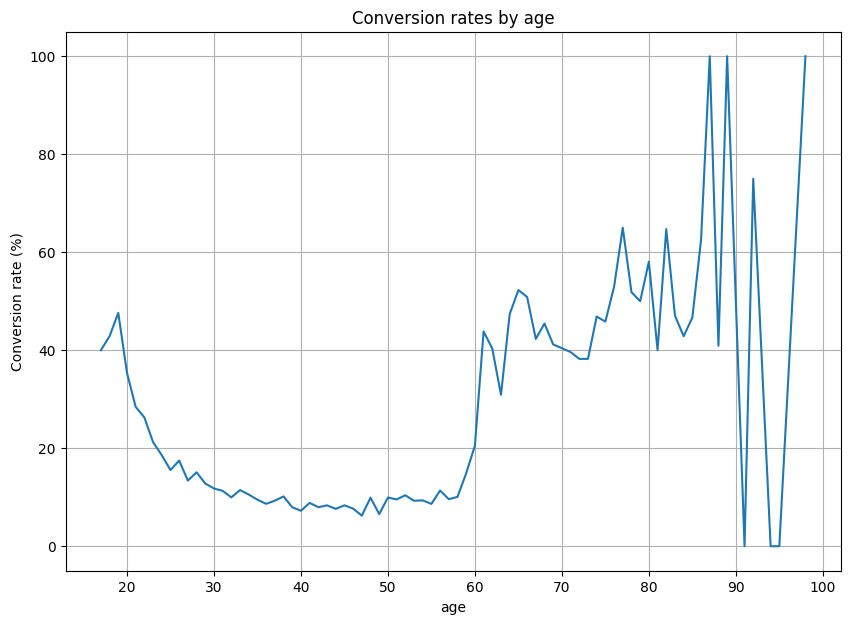

In [37]:
ax = conversions_by_ages.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion rates by age',
)

ax.set_xlabel('age')
ax.set_ylabel('Conversion rate (%)')

plt.show()

# - Age Groups

In [46]:
print(f"Age older than 70's: {len(df[df['age']>=70]) / len(df) * 100:.2f}%")

Age older than 70's: 1.14%


In [49]:
def age_group_class(age):
    if age < 30:
        return '[18, 30)'
    elif age < 40:
        return '[30, 40)'
    elif age < 50:
        return '[40, 50)'
    elif age < 60:
        return '[50, 60)'
    elif age < 70:
        return '[60, 70)'
    else:
        return '70+'

df['age_group'] = df['age'].apply(age_group_class)

In [48]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"


In [51]:
pd.DataFrame(
    df.groupby(df['age_group'])['conversion'].sum()
).sort_values(by=['conversion'], ascending=False)

,conversion
age_group,
"[30, 40)",1715
"[18, 30)",922
"[40, 50)",834
"[50, 60)",697
"[60, 70)",251
70+,221


In [52]:
pd.DataFrame(
    df.groupby(df['age_group'])['conversion'].count()
).sort_values(by=['conversion'], ascending=False)

,conversion
age_group,
"[30, 40)",16938
"[40, 50)",10526
"[50, 60)",6862
"[18, 30)",5669
"[60, 70)",724
70+,469


In [69]:
conversion_by_age_group = df.groupby(df['age_group'])['conversion'].sum() / df.groupby(df['age_group'])['conversion'].count() * 100
conversion_by_age_group = pd.DataFrame(conversion_by_age_group).sort_values(by=['conversion'], ascending=False)
conversion_by_age_group.head()

,conversion
age_group,
70+,47.121535
"[60, 70)",34.668508
"[18, 30)",16.263891
"[50, 60)",10.157389
"[30, 40)",10.125162


In [70]:
age_group_percent = pd.DataFrame(df['age_group'].value_counts()/len(df)*100)
age_group_percent.head()

,count
age_group,
"[30, 40)",41.123628
"[40, 50)",25.555987
"[50, 60)",16.660192
"[18, 30)",13.763718
"[60, 70)",1.757794


In [71]:
age_analysis = pd.merge(conversion_by_age_group, age_group_percent, on='age_group')
age_analysis.head()

,conversion,count
age_group,,
70+,47.121535,1.138681
"[60, 70)",34.668508,1.757794
"[18, 30)",16.263891,13.763718
"[50, 60)",10.157389,16.660192
"[30, 40)",10.125162,41.123628


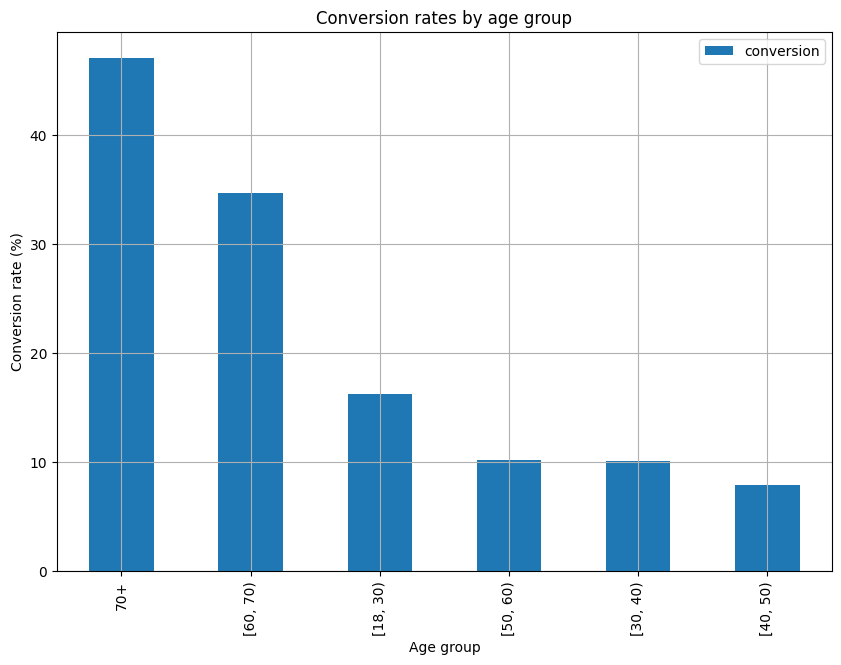

In [73]:
ax = conversion_by_age_group.plot(
    kind='bar',
    grid=True,
    figsize=(10, 7),
    title='Conversion rates by age group',
)

ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Age group')
plt.show()

# 4. Conversions vs Non-Conversions
## 4.1 Marital Status

In [86]:
conversion_by_martial = pd.pivot_table(df, values='y', index=['marital'], columns='conversion', aggfunc=len)
conversion_by_martial.head()

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [87]:
conversion_by_martial.columns = ['non_conversion', 'conversion']
conversion_by_martial

,non_conversion,conversion
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


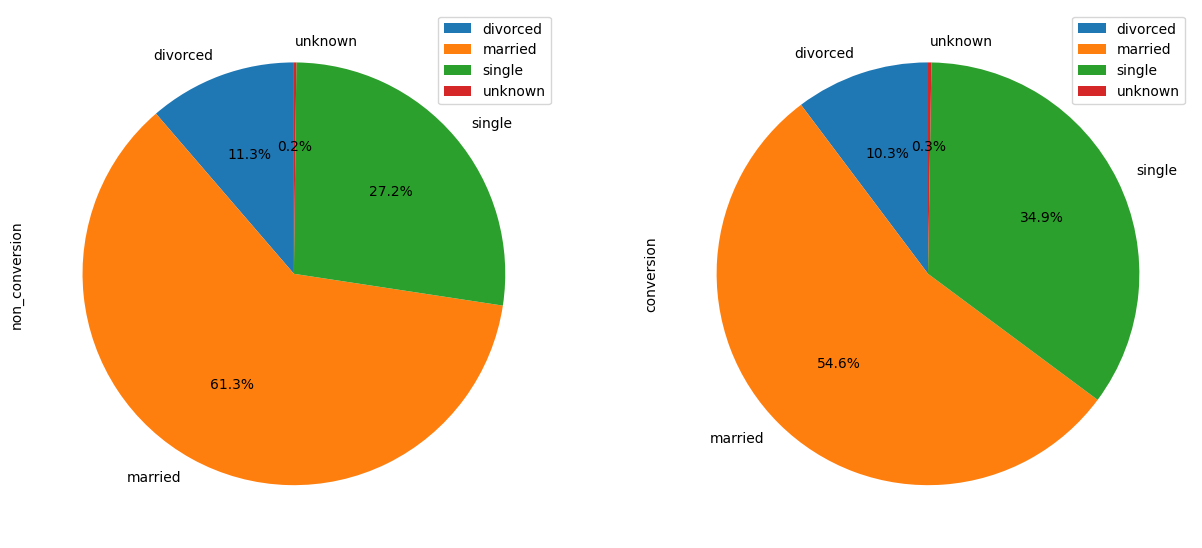

In [90]:
conversion_by_martial.plot(
    kind='pie',
    figsize=(15, 7),
    subplots=True,
    startangle=90,
    autopct='%1.1f%%',
)
plt.show()

## 4.2 Education

In [95]:
conversion_by_education = pd.pivot_table(df, values='y', index=['education'], columns='conversion', aggfunc=len)
conversion_by_education

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [96]:
conversion_by_education.columns = ['non_conversion', 'conversion']
conversion_by_education

,non_conversion,conversion
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


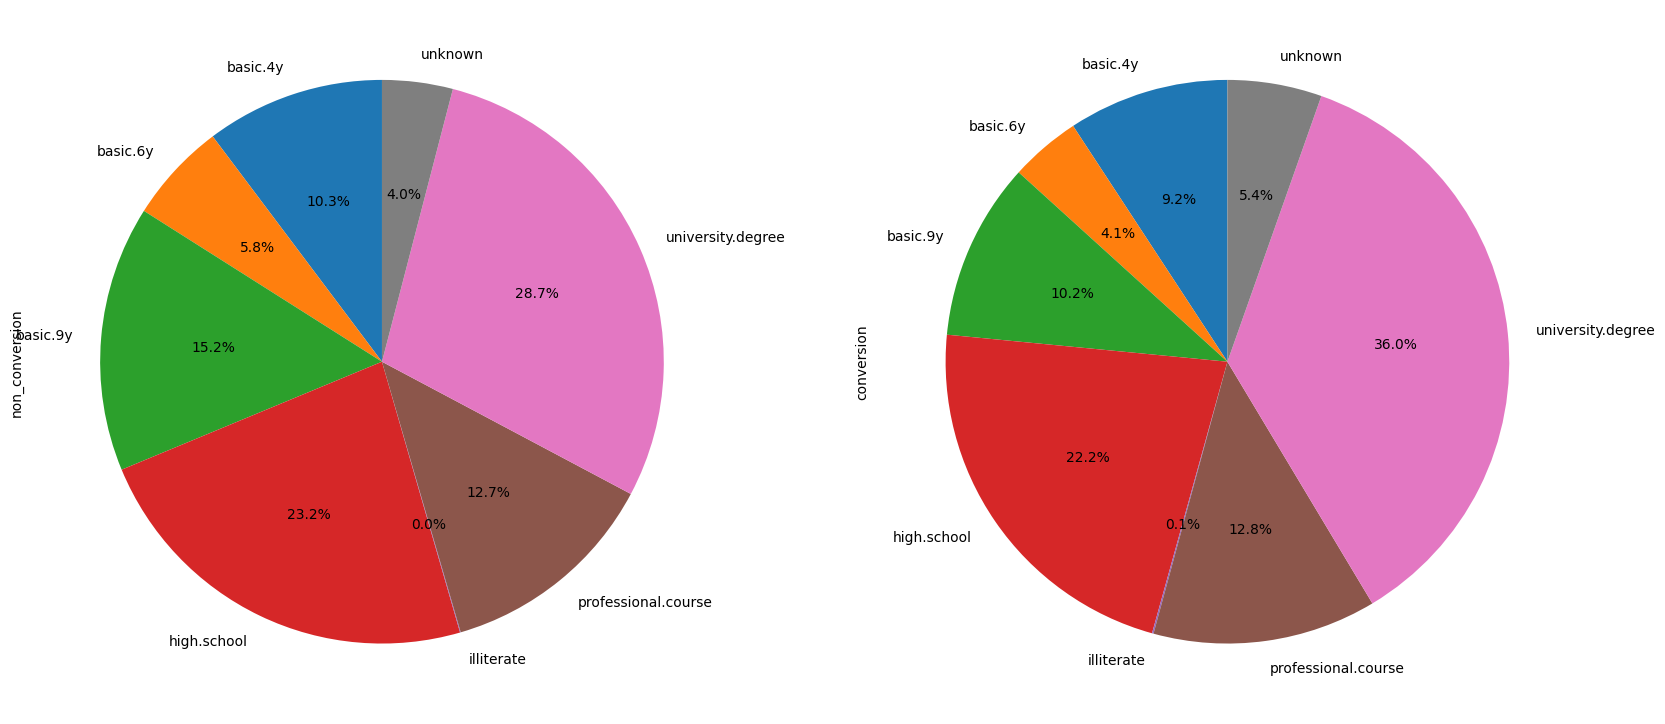

In [101]:
conversion_by_education.plot(
    kind='pie',
    figsize=(20, 15),
    subplots=True,
    startangle=90,
    autopct='%1.1f%%',
    legend=False,
)
plt.show()

## 4.3 Last Contact Duration

In [103]:
df.groupby(df['conversion'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [123]:
# df.loc[df['housing']=="no", ['age','marital']]

In [129]:
duration_df = pd.concat([
    df.loc[df['conversion']==1, 'duration'].reset_index(drop=True),
    df.loc[df['conversion']==0, 'duration'].reset_index(drop=True),
], axis=1)
duration_df.columns = ['conversion', 'non_conversion']

duration_df = duration_df / (60*60)
duration_df.head()

,conversion,non_conversion
0,0.437500,0.072500
1,0.289444,0.041389
2,0.407500,0.062778
3,0.160833,0.041944
4,0.128056,0.085278


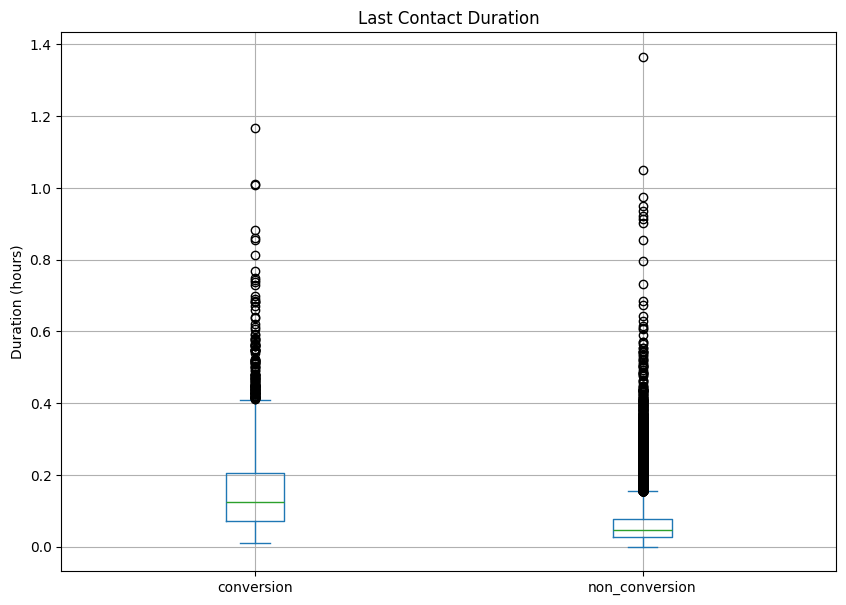

In [131]:
ax = duration_df.plot(
    kind='box',
    grid=True,
    figsize=(10, 7)
)
ax.set_ylabel('Duration (hours)')
ax.set_title('Last Contact Duration')
plt.show()

In [148]:
duration_outliers = pd.concat([
    duration_df.loc[duration_df['conversion']>0.5, 'conversion'],
    duration_df.loc[duration_df['non_conversion']>0.5, 'non_conversion']
], axis=1)
duration_outliers.columns = ['conversion', 'non_conversion']
duration_outliers.head()

,conversion,non_conversion
27,0.579722,NaN
40,0.560000,NaN
51,0.619722,NaN
85,0.518611,NaN
105,0.744444,NaN


In [149]:
duration_outliers.describe()

,conversion,non_conversion
count,60.000000,41.000000
mean,0.629755,0.662093
std,0.140193,0.197072
min,0.501667,0.501111
25%,0.543472,0.529444
50%,0.575000,0.570278
75%,0.682639,0.731944
max,1.166389,1.366111


## 5. Conversions by Age Group & Marital Status

In [159]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,64.0,151.0,6.0,0.0
"[18, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0


In [160]:
age_marital_df = age_marital_df.divide(
    df.groupby(by='age_group')['conversion'].count(),
    axis=0
)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


Text(0.5, 1.0, 'Conversion rates by Age & Marital Status')

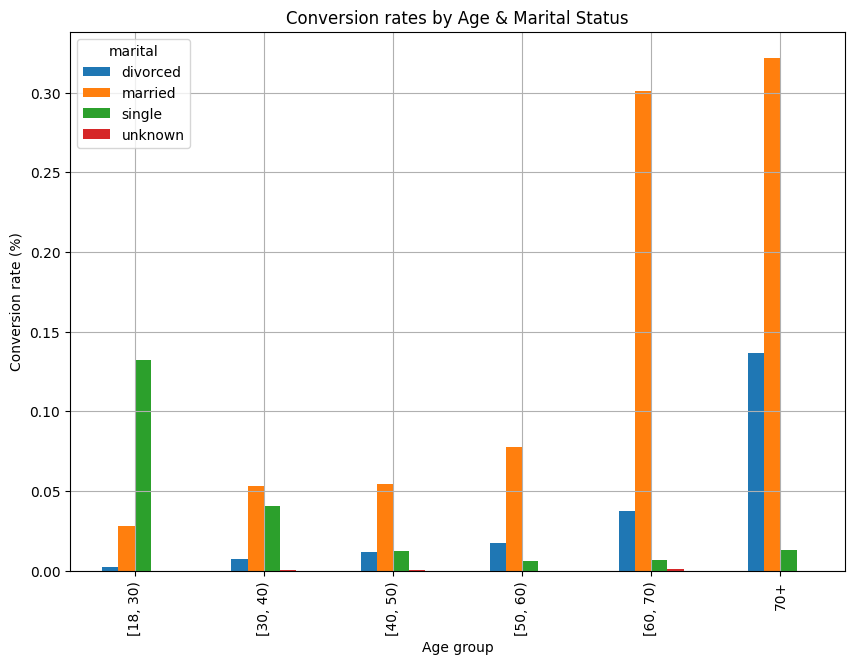

In [162]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Age group')
ax.set_title('Conversion rates by Age & Marital Status')

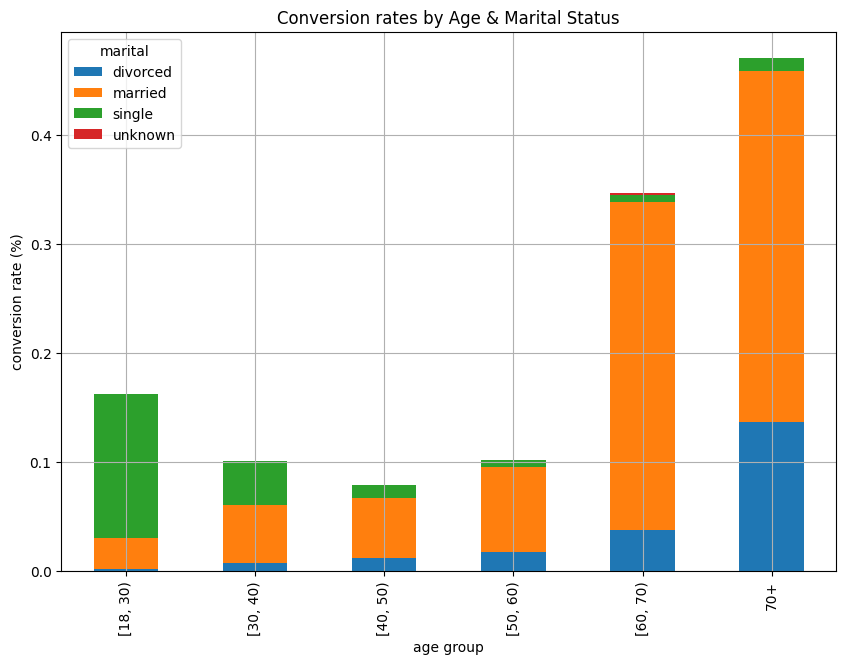

In [163]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()